# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

Reference: https://www.tensorflow.org/tutorials



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys, os
import cv2

In [0]:
url = 'https://i.pinimg.com/564x/19/75/da/1975da067708bb057acd2e108b8210e4.jpg'

In [0]:
import IPython.display as display
from PIL import Image
import PIL

In [5]:
!wget https://www.theluxecafe.com/wp-content/uploads/2014/07/ferrari-spider-indian-theluxecafe.jpg

--2020-06-05 14:38:48--  https://www.theluxecafe.com/wp-content/uploads/2014/07/ferrari-spider-indian-theluxecafe.jpg
Resolving www.theluxecafe.com (www.theluxecafe.com)... 103.50.163.41
Connecting to www.theluxecafe.com (www.theluxecafe.com)|103.50.163.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95114 (93K) [image/jpeg]
Saving to: ‘ferrari-spider-indian-theluxecafe.jpg’

ferrari-spider-indi 100%[===================>]  92.88K   440KB/s    in 0.2s    

2020-06-05 14:38:49 (440 KB/s) - ‘ferrari-spider-indian-theluxecafe.jpg’ saved [95114/95114]



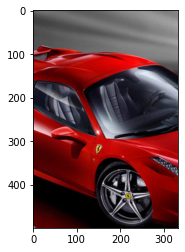

In [6]:
X = cv2.imread('ferrari-spider-indian-theluxecafe.jpg')
X = X[0:500,333:666]
X = cv2.cvtColor(X, cv2.COLOR_BGR2RGB)
plt.imshow(X)

In [7]:
IMAGE_SIZE = X.shape
X = np.expand_dims(X, axis=0)
y = np.ndarray([1])
print(X.shape)
print(y.shape)

(1, 500, 333, 3)
(1,)


In [0]:
i_layer = Input(shape = IMAGE_SIZE)
h_layer = Conv2D(2, (3,3), strides = 1, activation='relu', padding='same')(i_layer)
h_layer = Conv2D(2, (3,3), strides = 1, activation='relu', padding='same')(h_layer)
h_layer = Conv2D(2, (3,3), strides = 1, activation='relu', padding='same')(h_layer)
h_layer = Conv2D(2, (3,3), strides = 1, activation='relu', padding='same')(h_layer)
h_layer = Conv2D(2, (3,3), strides = 1, activation='relu', padding='same')(h_layer)
h_layer = Flatten()(h_layer)
o_layer = Dense(1, activation='sigmoid')(h_layer)

base_model = Model(i_layer, o_layer)

In [0]:
base_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [11]:
report = base_model.fit(X, y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 60.9311 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 943us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 976us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1

In [12]:
base_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 500, 333, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 500, 333, 2)       56        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 500, 333, 2)       38        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 500, 333, 2)       38        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 500, 333, 2)       38        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 500, 333, 2)       38        
_________________________________________________________________
flatten_1 (Flatten)          (None, 333000)            0   

In [0]:
#layers = [base_model.get_layer(name).output for name in names] 
layers = [base_model.get_layer('conv2d_5').output]
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

In [14]:
print(layers)

[<tf.Tensor 'conv2d_5/Identity:0' shape=(None, 500, 333, 2) dtype=float32>]


In [0]:
def get_image(url, max_dim=None):
  name = url.split('/')[-1]
  image_path = tf.keras.utils.get_file(name, origin=url)
  img = PIL.Image.open(image_path)
  if max_dim:
    img.thumbnail((max_dim, max_dim))
  return np.array(img)


In [16]:
sample_image = get_image(url, 500)

81920/81513 [==============================] - 0s 0us/step


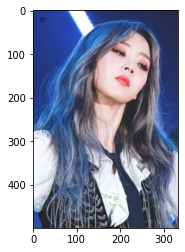

In [17]:
plt.imshow(sample_image)

In [0]:
sample_image = tf.Variable(sample_image)

In [19]:
sample_image.shape

TensorShape([500, 333, 3])

In [0]:
img_batch = tf.expand_dims(sample_image, axis=0)

In [21]:
img_batch.shape

TensorShape([1, 500, 333, 3])

In [0]:
activations = dream_model.predict(img_batch)

In [0]:
def calc_loss(img, model):
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
  img_batch = tf.expand_dims(img, axis=0)
  layer_activations = model(img_batch)
  if len(layer_activations) == 1:
    layer_activations = [layer_activations]

  losses = []
  for act in layer_activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  return  tf.reduce_sum(losses)



In [24]:
loss = calc_loss(sample_image, dream_model)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=19.01352>

In [0]:
def deprocess(image):
  image = 255*(image + 1.0)/2.0
  return tf.cast(image, tf.uint8)

In [0]:
# Display an image
def show(img):
  display.display(PIL.Image.fromarray(np.array(img)))
  #plt.imshow(img)


In [0]:
def deepdream(model,img, run_steps,step_size):
    print("Tracing")
    loss = tf.constant(0.0)
    for n in tf.range(run_steps):
      with tf.GradientTape() as tape:
        # This needs gradients relative to `img`
        # `GradientTape` only watches `tf.Variable`s by default
        tape.watch(img)
        loss = calc_loss(img, model)

      # Calculate the gradient of the loss with respect to the pixels of the input image.
      gradients = tape.gradient(loss, img)

      # Normalize the gradients.
      gradients /= tf.math.reduce_std(gradients) + 1e-8 
      
      # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
      # You can update the image by directly adding the gradients
      img = img + gradients*step_size
      img = tf.clip_by_value(img, -1, 1)

    return loss, img

In [0]:
def run_deep_dream_simple(img, steps=100, step_size=0.01):
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  img = tf.convert_to_tensor(img)
  step_size = tf.convert_to_tensor(step_size)
  steps_remaining = steps
  step = 0
  while steps_remaining:
    if steps_remaining>100:
      run_steps = tf.constant(100)
    else:
      run_steps = tf.constant(steps_remaining)
    steps_remaining -= run_steps
    step += run_steps

    loss, img = deepdream(dream_model, img, run_steps, tf.constant(step_size))
    #display.clear_output(wait=True)
    show(deprocess(img))
    print ("Step {}, loss {}".format(step, loss))


  result = deprocess(img)
  #display.clear_output(wait=True)
  show(result)

  return result

Tracing


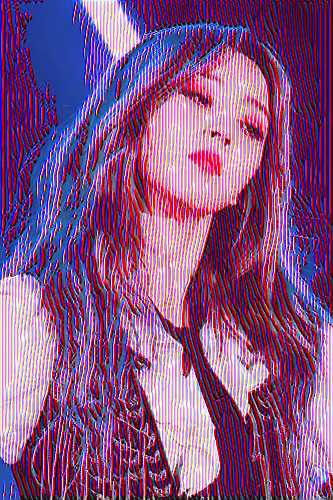

Step 100, loss 0.5602835416793823
Tracing


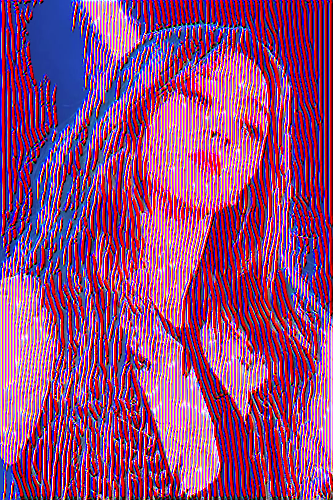

Step 200, loss 0.7118203639984131
Tracing


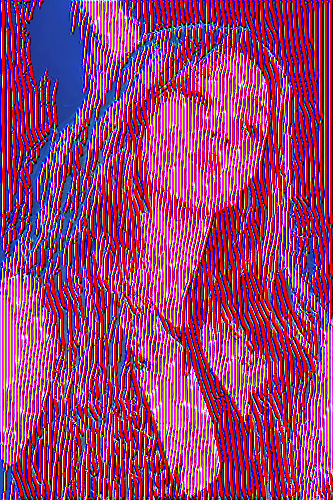

Step 300, loss 0.7696266770362854


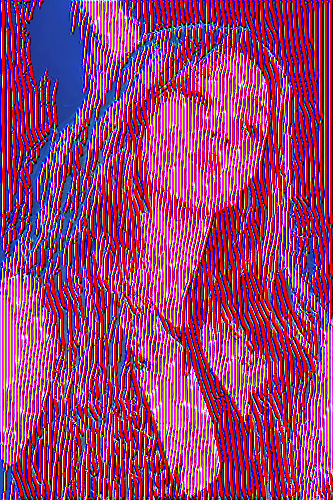

In [30]:
sample_image = get_image(url, 500)
dream_img = run_deep_dream_simple(img=sample_image, steps=300, step_size=0.01)
